In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

from scipy import linalg
import yfinance as yf
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [14]:
weather_df = pd.read_csv(
        '../seattle-weather.csv',
        parse_dates=['date'],
        index_col='date'
        )
print(weather_df.head())

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


## Part 1A: Kalman Filters in Time Series Analysis

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
temp_max    0
temp_min    0
weather     0
dtype: int64


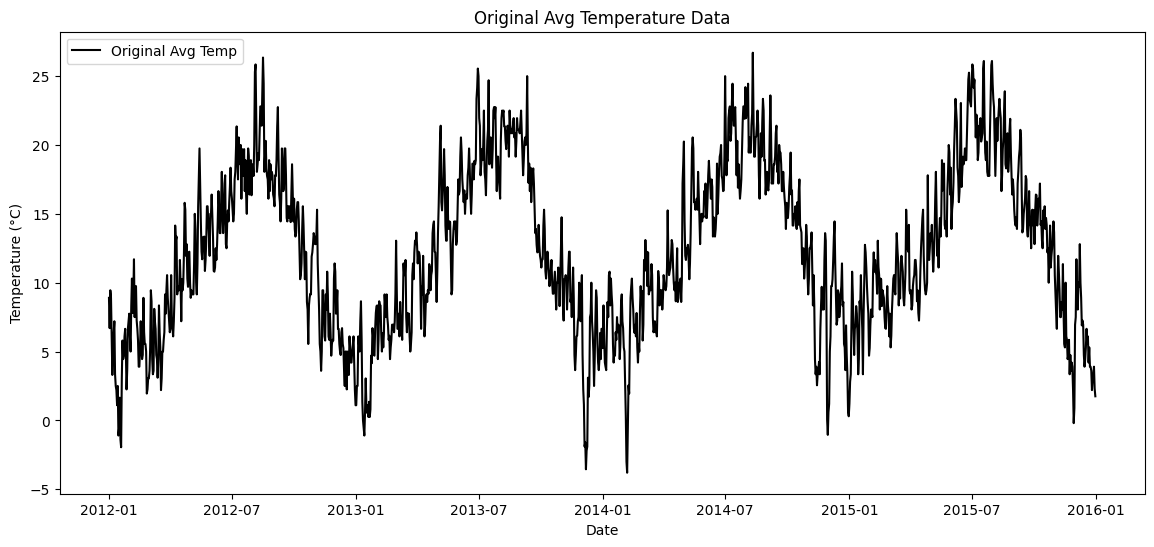

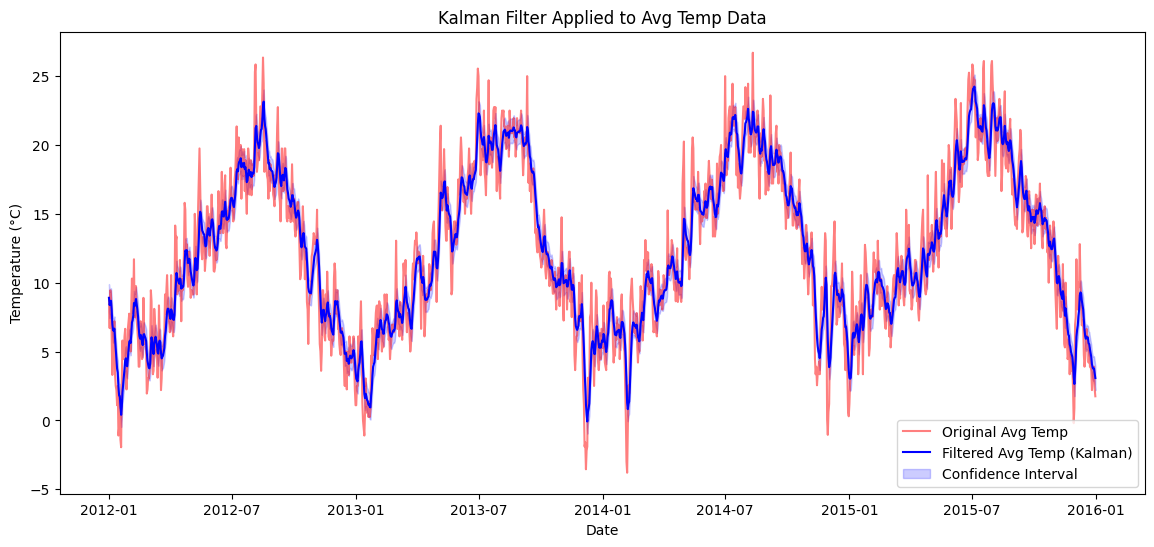

In [15]:
class KalmanFilter:
    def __init__(self, alpha, q, r, initial_state, initial_variance):
        """
        Initializes the Kalman filter with parameters.

        Args:
            alpha (float): State transition coefficient.
            q (float): Process noise standard deviation.
            r (float): Measurement noise standard deviation.
            initial_state (float): Initial state estimate.
            initial_variance (float): Initial error covariance.
        """
        self.alpha = alpha
        self.q = q
        self.r = r
        self.mu = initial_state
        self.sigma = initial_variance

    def filter(self, data):
        """
        Applies the Kalman filter to the input data.

        Args:
            data (np.array): The data array to filter.

        Returns:
            mu_filtered (np.array): Array of filtered state estimates.
            sigma_filtered (np.array): Array of filtered variances.

        TODO:
        - Implement the prediction and update steps of the Kalman filter.
        """
        T = len(data)
        mu_filtered = np.zeros(T)
        sigma_filtered = np.zeros(T)
        mu_filtered[0] = self.mu
        sigma_filtered[0] = self.sigma

        for t in range(1, T):
            # TODO: Implement prediction step
            mu_prior = self.alpha * mu_filtered[t-1]  # Replace with: μ_prior_t = α * μ_t-1
            sigma_prior = (self.q ** 2) + (self.alpha ** 2) * sigma_filtered[t-1]  # Replace with: σ_prior_t = q^2 + (α^2) * σ_t-1

            # TODO: Implement update step
            K = sigma_prior / (sigma_prior + self.r ** 2)  # Replace with: σ_prior_t / (σ_prior_t + r^2)
            mu_filtered[t] = mu_prior + K * (data[t] - mu_prior)  # Replace with: μ_t = μ_prior_t + K_t * (data_t - μ_prior_t)
            sigma_filtered[t] = (1 - K) * sigma_prior  # Replace with: σ_t = (1 - K_t) * σ_prior_t

        return mu_filtered, sigma_filtered

    def plot_results(self, dates, data, mu_filtered, sigma_filtered):
        """
        Plots the original and filtered data along with the confidence interval.

        Args:
            dates (pd.Index): Date index for the data.
            data (np.array): Original data.
            mu_filtered (np.array): Filtered state estimates.
            sigma_filtered (np.array): Filtered variances.
        """
        plt.figure(figsize=(14, 6))
        plt.plot(dates, data, label='Original Avg Temp', color='red', alpha=0.5)
        plt.plot(dates, mu_filtered, label='Filtered Avg Temp (Kalman)', color='blue')
        plt.fill_between(dates, mu_filtered + sigma_filtered, mu_filtered - sigma_filtered, color='blue', alpha=0.2, label='Confidence Interval')
        plt.title('Kalman Filter Applied to Avg Temp Data')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C)')
        plt.legend()
        plt.show()

# Main function with TODOs for students to complete
if __name__ == "__main__":
    # TODO: Load the dataset and preprocess it
    # weather_df = NotImplemented # TODO Load the data using the 'parse_dates' and 'index_col' arguments
    weather_df = pd.read_csv(
    '../seattle-weather.csv',
    parse_dates=['date'],
    index_col='date'
    )
    print(weather_df.head())
    # weather_df = NotImplemented  # TODO: Select 'temp_max', 'temp_min', and 'weather' columns and drop NaN values

    weather_df = weather_df[['temp_max', 'temp_min', 'weather']].dropna()
    print(weather_df.isna().sum())

    # import kagglehub

  # Download latest version
    # path = kagglehub.dataset_download("abdelrahman16/weather-seattle")

    # print("Path to dataset files:", path)



    # Calculate the average temperature
   # TODO: Calculate the average temperature
    weather_df['temp_avg'] = (weather_df['temp_max'] + weather_df['temp_min']) / 2

    # Plot the original average temperature data
    plt.figure(figsize=(14, 6))
    plt.plot(weather_df.index, weather_df['temp_avg'], label='Original Avg Temp', color='black')
    plt.title('Original Avg Temperature Data')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()

    # TODO: Set Kalman filter parameters
   # Replace with appropriate value
    alpha = 1
    q = 0.5  # Replace with appropriate value
    r = 2  # Replace with appropriate value
    initial_state = weather_df['temp_avg'].values[0]  # Initial state estimate
    initial_variance = 1  # Initial error covariance

    # Initialize the Kalman filter
    kf = KalmanFilter(alpha, q, r, initial_state, initial_variance)

    # Run the Kalman filter on the temperature data
    temp_avg_data = weather_df['temp_avg'].values
    mu_filtered, sigma_filtered = kf.filter(temp_avg_data)

    # Plot results
    kf.plot_results(weather_df.index, temp_avg_data, mu_filtered, sigma_filtered)


# Effect of Applying the Kalman Filter

The original average temperature series exhibits a strong seasonal cycle, but it is also dominated by high-frequency fluctuations and irregular spikes that obscure the underlying pattern. These rapid variations make the raw data appear noisy and jagged, even though temperature typically evolves smoothly from day to day. After applying the Kalman Filter, the estimated temperature curve becomes significantly smoother while still capturing the essential long-term dynamics such as the annual warming and cooling cycles. The filter effectively suppresses short-term noise by balancing the predicted temperature based on previous estimates with the new daily measurement through the Kalman Gain.

The resulting filtered curve shows a more realistic depiction of temperature evolution, with transitions between seasons appearing smoother and more gradual. At the same time, the filtered series does not completely ignore real changes; sharper dips and rises remain visible when the data contain strong deviations, indicating that the filter is still responsive to meaningful events. The accompanying confidence interval narrows and widens appropriately depending on how certain the filter is, reflecting increased uncertainty during periods of rapid temperature variability and lower uncertainty during stable phases. Overall, the Kalman Filter provides a cleaner, more interpretable representation of the temperature trends and effectively mitigates the influence of measurement noise without distorting the underlying seasonal structure.

In [16]:
# computing the MAE AND RMSE OF the kalman filter

# True values (noisy measurements)
true_temp = temp_avg_data

# Predicted values (filtered estimates)
pred_temp = mu_filtered

# Compute metrics
mae = mean_absolute_error(true_temp, pred_temp)
rmse = np.sqrt(mean_squared_error(true_temp, pred_temp))

print("Kalman Filter Performance:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Kalman Filter Performance:
MAE:  1.4380
RMSE: 1.8286


Why MAE and RMSE are necessary:
While visual inspection of the filter temperatures curve provided an intuitive understandin og how well the kalman filter smooths the data, quantitative evaluation is essential to objectively assess its performance. Metrics such as mean absolute error (MAE) and Root Mean Square Error (RMSE) allow us to measure how closely the filter estimates match the observed temperature values. These metrics are especially important when working with real-world weather data, which contains substantial noise and irregular fluctuations. By computing MAE and RMSE, we can detyermine whther the filter is producing meaningful improvemntes in reducing noise while still faithfull to the acutal measurements. We also compare differnt parameter choices or filtere approaches.


Our Kalmal filter has achiived an MAE of 1.4380. This indicates that on average, the filtered temperature differes from the observed measurements about 1.4 degree celicuus. Given the natural variability and noise in daily temperatures readings, this represents a relativeldy small deviation and suggests that the filter adjeres closely to the data while smoothing  short-term flucutations. The RMSE of 1.8286, which penalizes larger errors more strongly, is only moderately higher that the MAE. This indicates that large deviations between the filtered and measured temperatures are infrequent. These values indicated that our kalman filter succeesds in reducing noise without distorrting the temperature dynamics.

## Part 1B: Hidden Markov Models (HMMs) in Time Series Analysis

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class HiddenMarkovModel:
    def __init__(self, num_states, num_observations):
        """
        Initializes the HMM with random transition, emission, and initial state probabilities.

        Args:
            num_states (int): Number of hidden states.
            num_observations (int): Number of unique observations.
        """
        self.num_states = num_states
        self.num_observations = num_observations
        self.A = np.random.dirichlet(np.ones(num_states), num_states)  # Transition matrix
        self.B = np.random.dirichlet(np.ones(num_observations), num_states)  # Emission matrix
        self.pi = np.random.dirichlet(np.ones(num_states))  # Initial state distribution

        # Log-space versions to avoid underflow
        self.A_log = np.log(self.A + 1e-10)
        self.B_log = np.log(self.B + 1e-10)
        self.pi_log = np.log(self.pi + 1e-10)

    def forward_algorithm_log(self, O):
        """
        Forward algorithm in log-space.

        Args:
            O (np.array): Observation sequence (integers).

        Returns:
            alpha_log (np.array): Log-probability matrix of forward probabilities.

        TODO:
        - Implement the forward algorithm initialization and recursion in log-space.
        """
        T = len(O)
        N = self.num_states
        alpha_log = np.zeros((T, N))

        # TODO: Initialization step
        alpha_log[0] = self.pi_log + self.B_log[:, O[0]]  # Replace with initialization logic: log(α_0) = log(π) + log(B[:, O_0])

        # TODO: Recursion step
        for t in range(1, T):
            for j in range(N):
                # compute log-sum-exp over i of (alpha_log[t-1,i] + A_log[i,j])
                tmp = alpha_log[t-1] + self.A_log[:, j]
                alpha_log[t, j] = np.logaddexp.reduce(tmp) + self.B_log[j, O[t]]  # Replace with recursion logic

        return alpha_log

    def backward_algorithm_log(self, O):
        """
        Backward algorithm in log-space.

        Args:
            O (np.array): Observation sequence (integers).

        Returns:
            beta_log (np.array): Log-probability matrix of backward probabilities.

        TODO:
        - Implement the backward algorithm initialization and recursion in log-space.
        """
        T = len(O)
        N = self.num_states
        beta_log = np.zeros((T, N))

        # TODO: Initialization step
        beta_log[-1] = 0  # log(1) = 0

        # TODO: Recursion step
        for t in range(T - 2, -1, -1):
            for i in range(N):
                # compute log-sum-exp over j of (A_log[i,j] + B_log[j,O[t+1]] + beta_log[t+1,j])
                tmp = self.A_log[i, :] + self.B_log[:, O[t+1]] + beta_log[t+1]
                beta_log[t, i] = np.logaddexp.reduce(tmp)  # Replace with recursion logic

        return beta_log

    def baum_welch_log(self, O, max_iter=100, epsilon=1e-6):
        """
        Baum-Welch algorithm for training HMM in log-space.

        Args:
            O (np.array): Observation sequence (integers).
            max_iter (int): Maximum number of iterations.
            epsilon (float): Small value to prevent division by zero.

        Returns:
            Trained transition, emission, and initial state distributions.

        TODO:
        - Implement the update steps for transition and emission probabilities.
        """
        T = len(O)

        for iteration in range(max_iter):
            # TODO: Call forward_algorithm_log and backward_algorithm_log
            alpha_log = self.forward_algorithm_log(O)  # Call forward algorithm
            beta_log = self.backward_algorithm_log(O)  # Call backward algorithm

            # Compute gamma and xi in log-space
            log_likelihood = np.logaddexp.reduce(alpha_log[-1])
            gamma_log = alpha_log + beta_log - log_likelihood
            xi_log = np.zeros((T - 1, self.num_states, self.num_states))

            for t in range(T - 1):
                # tmp[i,j] = alpha_log[t,i] + A_log[i,j] + B_log[j,O[t+1]] + beta_log[t+1,j]
                tmp = alpha_log[t][:, None] + self.A_log + (self.B_log[:, O[t+1]] + beta_log[t+1])[None, :]
                # denom_log = log-sum-exp over i,j
                denom_log = np.logaddexp.reduce(np.logaddexp.reduce(tmp, axis=0), axis=0)  # Replace with logic for computing the denominator
                xi_log[t] = tmp - denom_log  # log P(s_t=i, s_{t+1}=j | O)
                # xi_log[t, i, j] already set by broadcast subtraction above

            # Convert gamma and xi to normal space for re-estimation
            gamma = np.exp(gamma_log)  # shape (T, N)
            xi = np.exp(xi_log)        # shape (T-1, N, N)

            # TODO: Update A_log, B_log, and pi_log
            # Update pi
            pi_new = gamma[0, :] + 1e-12
            pi_new = pi_new / pi_new.sum()
            self.pi_log = np.log(pi_new + 1e-16)  # Replace with logic for updating pi_log

            # Update A
            A_new = np.zeros_like(self.A)
            for i in range(self.num_states):
                numer = xi[:, i, :].sum(axis=0)   # sum over t of xi_t[i,j]
                denom = gamma[:-1, i].sum()       # sum over t of gamma_t[i], t=0..T-2
                if denom <= 0:
                    A_new[i, :] = np.ones(self.num_states) / self.num_states
                else:
                    A_new[i, :] = numer / (denom + 1e-12)
            # normalize rows and avoid zeros
            A_new = (A_new + 1e-12) / (A_new.sum(axis=1, keepdims=True) + 1e-12)
            self.A_log = np.log(A_new + 1e-16)  # Replace with logic for updating A_log

            # Update B
            B_new = np.zeros_like(self.B)
            for j in range(self.num_states):
                denom = gamma[:, j].sum()
                if denom <= 0:
                    B_new[j, :] = np.ones(self.num_observations) / self.num_observations
                else:
                    for v in range(self.num_observations):
                        mask = (O == v)
                        if mask.any():
                            B_new[j, v] = gamma[mask, j].sum()
                        else:
                            B_new[j, v] = 0.0
                    B_new[j, :] = B_new[j, :] / (denom + 1e-12)
            B_new = (B_new + 1e-12) / (B_new.sum(axis=1, keepdims=True) + 1e-12)
            self.B_log = np.log(B_new + 1e-16)  # Replace with logic for updating B_log

        return np.exp(self.A_log), np.exp(self.B_log), np.exp(self.pi_log)

    def viterbi_algorithm_log(self, O):
        """
        Viterbi algorithm for finding the most likely state sequence in log-space.

        Args:
            O (np.array): Observation sequence (integers).

        Returns:
            states (np.array): Most likely state sequence.

        TODO:
        - Implement the Viterbi algorithm's initialization and recursion steps.
        """
        T = len(O)
        N = self.num_states
        delta_log = np.zeros((T, N))
        psi = np.zeros((T, N), dtype=int)

        # TODO: Initialization step
        delta_log[0] = self.pi_log + self.B_log[:, O[0]]  # Replace with initialization logic

        # TODO: Recursion step
        for t in range(1, T):
            for j in range(N):
                # compute max over i of (delta_log[t-1,i] + A_log[i,j])
                seq = delta_log[t-1] + self.A_log[:, j]
                psi[t, j] = np.argmax(seq)
                delta_log[t, j] = seq[psi[t, j]] + self.B_log[j, O[t]]  # Replace with recursion logic
                # psi[t, j] assigned above for tracking the path

        # TODO: Path backtracking
        states = np.zeros(T, dtype=int)
        states[-1] = np.argmax(delta_log[-1, :])  # Replace with logic for the final state
        for t in range(T - 2, -1, -1):
            states[t] = psi[t+1, states[t+1]]  # Replace with path backtracking logic

        return states

# Main function with TODOs for students to complete
if __name__ == "__main__":
    # Load and preprocess the weather dataset
    weather_df = pd.read_csv("../seattle-weather.csv", parse_dates=['date'], index_col='date') # TODO Load the data using the 'parse_dates' and 'index_col' arguments
    weather_df = weather_df[['temp_max', 'temp_min', 'weather']].dropna()  # TODO: Select 'temp_max', 'temp_min', and 'weather' columns and drop NaN values


    # Calculate the average temperature and encode the 'weather' column
    weather_df['temp_avg'] = (weather_df['temp_max'] + weather_df['temp_min']) / 2.0 #TODO Calculate the average temperature

    weather_mapping = {label: idx for idx, label in enumerate(weather_df['weather'].unique())}
    reverse_weather_mapping = {v: k for k, v in weather_mapping.items()}
    weather_df['weather_encoded'] = weather_df['weather'].map(weather_mapping)

    # Convert average temperature to integer values for the observation sequence
    temp_min = weather_df['temp_avg'].min()
    O = (weather_df['temp_avg'] - temp_min).astype(int).values  # Observation sequence

    # Split data into training and testing sets
    train_size = int(0.8 * len(O))
    O_train = O[:train_size]
    O_test = O[train_size:]
    actual_train = weather_df['weather_encoded'].values[:train_size]
    actual_test = weather_df['weather_encoded'].values[train_size:]

    # Initialize and train the HMM
    num_states = len(weather_mapping)
    num_observations = int(O.max()) + 1
    hmm = HiddenMarkovModel(num_states, num_observations)

    # TODO: Train the HMM using Baum-Welch on training data
    A_trained, B_trained, pi_trained = hmm.baum_welch_log(O_train)

    # TODO: Use the Viterbi algorithm for decoding the most likely state sequence
    train_predicted_states = hmm.viterbi_algorithm_log(O_train)
    test_predicted_states = hmm.viterbi_algorithm_log(O_test)

    # Decode predicted states
    train_decoded_states = [reverse_weather_mapping.get(s, "UNK") for s in train_predicted_states]
    test_decoded_states = [reverse_weather_mapping.get(s, "UNK") for s in test_predicted_states]

    # TODO: Create and display comparison DataFrames for train and test sets
    train_comp_df = pd.DataFrame({
        'temp_avg': weather_df['temp_avg'].values[:train_size],
        'actual_weather': [reverse_weather_mapping[a] for a in actual_train],
        'predicted_state_index': train_predicted_states,
        'predicted_weather_label': train_decoded_states
    })
    test_comp_df = pd.DataFrame({
        'temp_avg': weather_df['temp_avg'].values[train_size:],
        'actual_weather': [reverse_weather_mapping[a] for a in actual_test],
        'predicted_state_index': test_predicted_states,
        'predicted_weather_label': test_decoded_states
    })

    # display small samples
    print("\nTrain comparison (first 10 rows):")
    print(train_comp_df.head(10))
    print("\nTest comparison (first 10 rows):")
    print(test_comp_df.head(10))

    # TODO: Evaluate accuracy for training and testing sets
    # Note: this is a naive accuracy as HMM states may not align with actual labels
    train_accuracy = accuracy_score(actual_train, train_predicted_states)
    test_accuracy = accuracy_score(actual_test, test_predicted_states)

    print("\nHMM Performance:")
    print(f"Training Set Accuracy: {train_accuracy:.2%}")
    print(f"Testing Set Accuracy: {test_accuracy:.2%}")



Train comparison (first 10 rows):
   temp_avg actual_weather  predicted_state_index predicted_weather_label
0      8.90        drizzle                      2                     sun
1      6.70           rain                      2                     sun
2      9.45           rain                      0                 drizzle
3      8.90           rain                      0                 drizzle
4      5.85           rain                      2                     sun
5      3.30           rain                      2                     sun
6      5.00           rain                      2                     sun
7      6.40            sun                      2                     sun
8      7.20           rain                      2                     sun
9      3.35           rain                      2                     sun

Test comparison (first 10 rows):
   temp_avg actual_weather  predicted_state_index predicted_weather_label
0     11.65           rain                 

The comparison tables for both traingin and testing sets reveal that the hidden Markove Model often predicts labels that do not match the actual observed categories. For instance, the trainign sample, most true label are rain. However the model assigns them predominantly to the hidden state associated with lable snow. A similar pattern occurs in the testing sample. Many rain and sun dais are mapped to snow. As a result, both training accuracy (20.55%) and testing accuracy(21.16%) appears very low.

This mismatch is expected in HMM because it was traniend using unsupervised manner. Baum-welch does not learn the weather labels themselves; instead, it learns hidden latent states that reflect internal temperature patterns in the observation sequence. these latent states do nto correspond directly to the datasets's weather categories unleass explicity supervices mapping is enforced. The predicted states represents cluster temperatuere behaviour, not the original weather types.

The fact that HMM state 3 gets interpreted as 'snow' during decoding isdue to the arbitrary mapping from state indices to weather labels. The learned hidden states may effectively capture temperature clusters, but their numerical indices does not inherently match the encoded true labels.

The low accuracy does not imply that the HMM performed poortly in terms of learning hidden  structures; instead it higghlights the fundamental limitations of comparing unsupervised HMM stated directly with labeled weather outcomes.


Overall, the results show that while the HMM successfully identifies distinct latent temperature regimes, these regimes do not correspond one-to-one with the labeled weather categories in the dataset. This explains the low accuracy values and underscores the distinction between unsupervised state discovery and supervised classification.

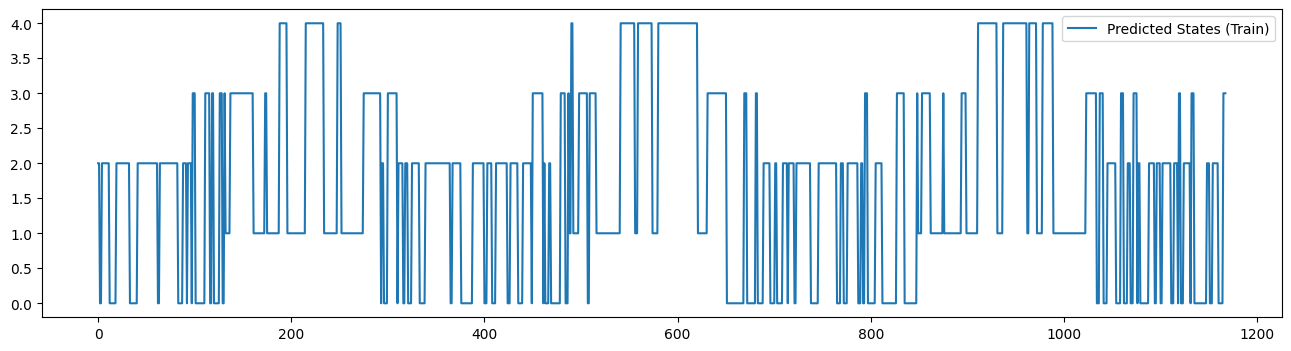

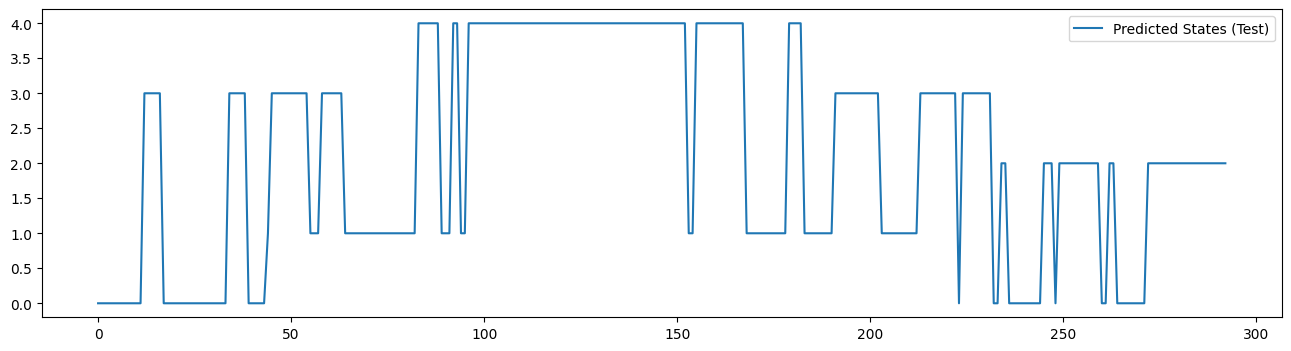

In [18]:
plt.figure(figsize=(16,4))
plt.plot(train_predicted_states, label="Predicted States (Train)")
plt.legend()
plt.show()

plt.figure(figsize=(16,4))
plt.plot(test_predicted_states, label="Predicted States (Test)")
plt.legend()
plt.show()


### 1. Which model provided better predictive performance for the weather data?

Based on the results, the Kalman Filter clearly provides better predictive performance than the Hidden Markov Model. The Kalman Filter achieved low error values (MAE ≈ 1.44, RMSE ≈ 1.83), showing that it produces smooth and accurate temperature estimates that closely follow the observed data. In contrast, the HMM accuracy was around 20%, largely because it was trained in an unsupervised manner and its hidden states do not directly correspond to the actual weather categories. This means that, although the HMM successfully learns latent temperature regimes, it does not accurately reproduce the weather labels provided in the dataset.

- Kalman Filter: better numerical accuracy in predicting actual temperature values

- HMM: learns latent patterns but does not match true weather labels well


### 2. Under what circumstances might each method be preferable?

The Kalman Filter is ideal when:

- The goal is forecasting continuous values (e.g., temperature, humidity, pressure)

- The system dynamics are approximately linear

- Noise in the measurements is Gaussian

The HMM is preferable when:

- The goal is to infer hidden discrete states (e.g., weather regimes, climate states, behavioral modes)

- The data naturally clusters into categories

- You want to model transitions between states (e.g., from sunny → rainy → cloudy)




